In [ ]:
#20BCS171-Rahul Panwar
#20BCS016- Adarsh Kumar
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =  pd.read_json('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json', lines=True)
df.rename(columns={'headline': 'text'}, inplace=True)
df.head()

,article_link,text,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:

df.drop(['article_link'] , inplace =True , axis = 1)

In [ ]:
df.shape 

(26709, 2)

In [ ]:
df_len = df['text'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {df_len} words in the headline')

We have 263026 words in the headline


In [ ]:
df.isnull().sum() 

text            0
is_sarcastic    0
dtype: int64

In [ ]:
df['is_sarcastic'].value_counts() 

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [ ]:
df.is_sarcastic.unique()

array([0, 1])

In [ ]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

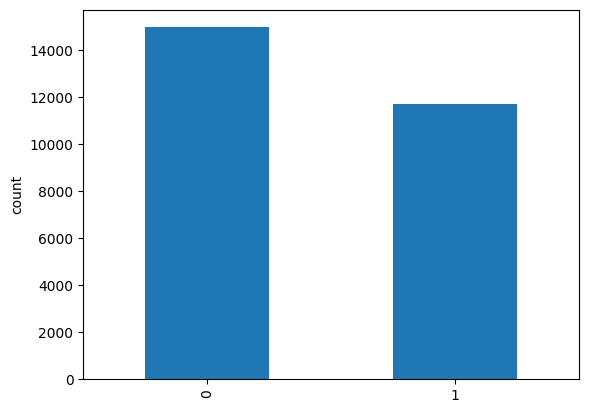

In [ ]:
df.is_sarcastic.value_counts()
sns.countplot(df['is_sarcastic'].value_counts())
df['is_sarcastic'].value_counts().plot(kind='bar')
plt.show()

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words("english"))


def clean_txt(text):  
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = re.sub('http\S+' , '' , text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

df['text'] = df['text'].apply(clean_txt)  

In [ ]:
from nltk.corpus import stopwords
import string 
stop = set(stopwords.words('english'))
a = list(string.punctuation)
stop.update(a)

In [ ]:
len(stop)

211

In [ ]:
df_clean_len = df['text'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {df_clean_len} words to work with')

After text cleaning we have only 187817 words to work with


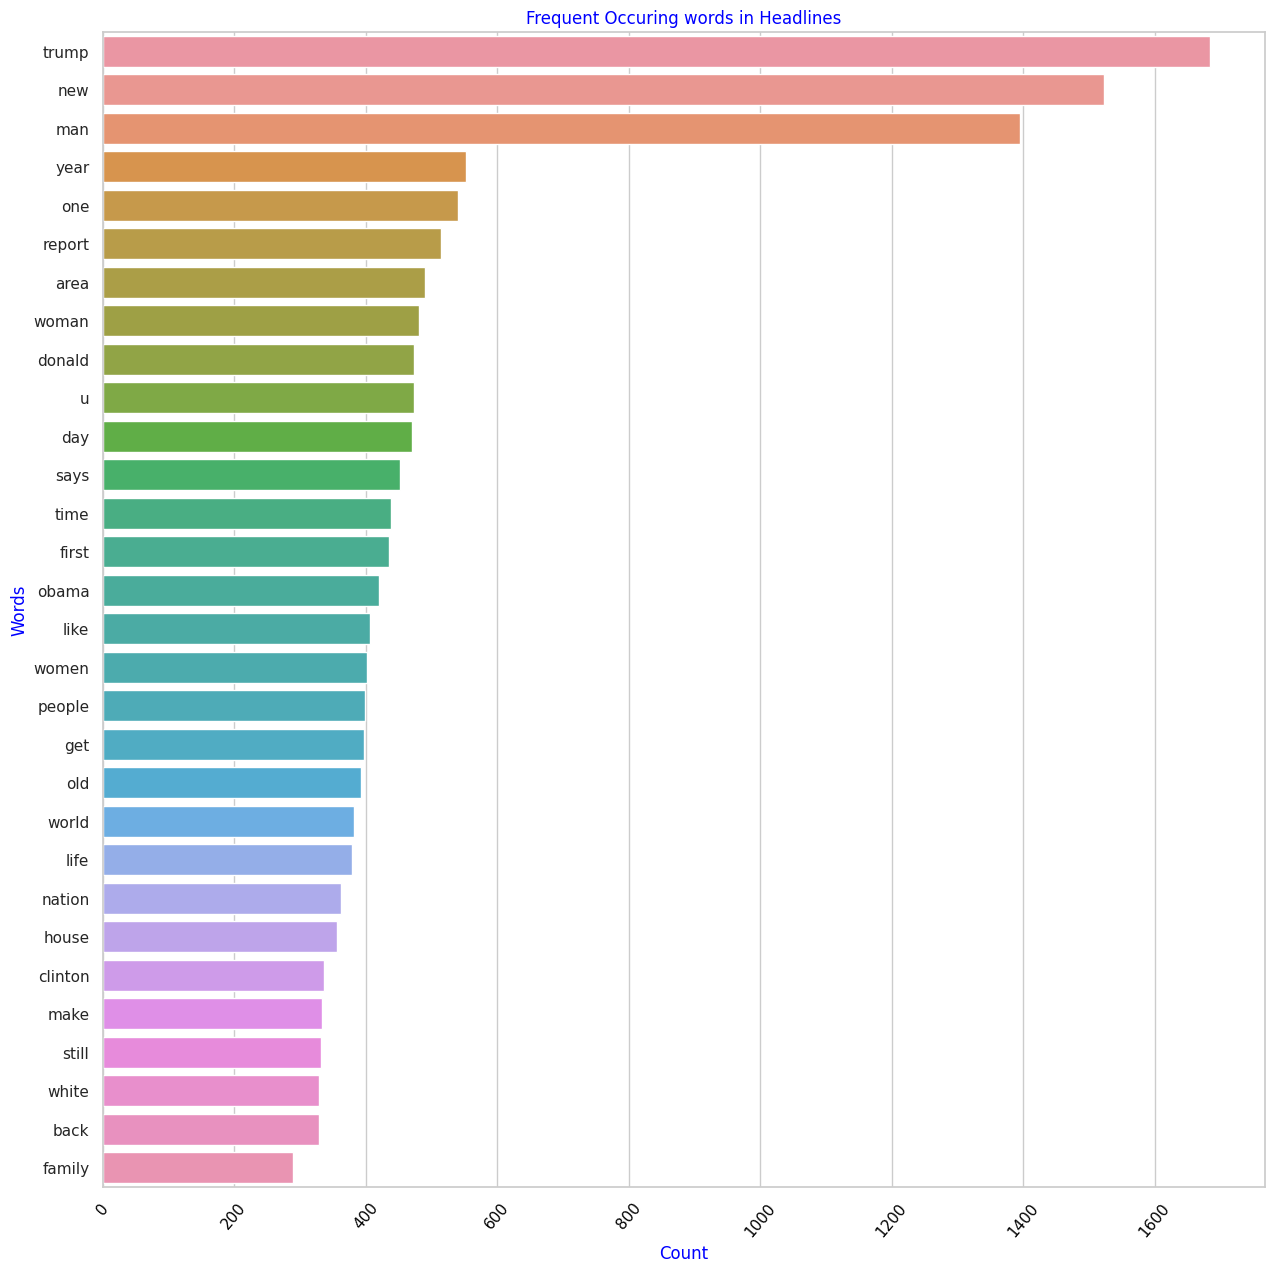

In [ ]:
from collections import Counter 
import seaborn as sns 

text = df['text']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) 

sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

In [ ]:
from bs4 import BeautifulSoup
from nltk import stem
import re
snow = stem.SnowballStemmer('english')
def strip_html(text):
    soup = BeautifulSoup(text ,  'html.parser')
    return soup.get_text() 

In [ ]:
def removing_stopwords(text):
    text = text.lower()
    final_text = []
    for i in text.split():
        if(i.strip().lower() not in stop):
            final_text.append(snow.stem(i.strip()))
    return ' '.join(final_text)

In [ ]:
def denoise(text):
    text = text.lower()
    text = strip_html(text)
    text = clean_txt(text)
    text = removing_stopwords(text)
    return text

In [ ]:
df['cleaned'] =df['text'].apply(denoise)

In [ ]:
df.head()

,text,is_sarcastic,cleaned
0,former versace store clerk sues secret black c...,0,former versac store clerk sue secret black cod...
1,roseanne revival catches thorny political mood...,0,roseann reviv catch thorni polit mood better wors
2,mom starting fear son web series closest thing...,1,mom start fear son web seri closest thing gran...
3,boehner wants wife listen come alternative deb...,1,boehner want wife listen come altern debt redu...
4,j k rowling wishes snape happy birthday magica...,0,j k rowl wish snape happi birthday magic way


In [ ]:
df['cleaned'].iloc[1]

'roseann reviv catch thorni polit mood better wors'

In [ ]:
df['all_cleaned'] = df['cleaned'].apply(denoise)
df.head()

,text,is_sarcastic,cleaned,all_cleaned
0,former versace store clerk sues secret black c...,0,former versac store clerk sue secret black cod...,former versac store clerk sue secret black cod...
1,roseanne revival catches thorny political mood...,0,roseann reviv catch thorni polit mood better wors,roseann reviv catch thorni polit mood better wor
2,mom starting fear son web series closest thing...,1,mom start fear son web seri closest thing gran...,mom start fear son web seri closest thing gran...
3,boehner wants wife listen come alternative deb...,1,boehner want wife listen come altern debt redu...,boehner want wife listen come altern debt redu...
4,j k rowling wishes snape happy birthday magica...,0,j k rowl wish snape happi birthday magic way,j k rowl wish snape happi birthday magic way


In [ ]:
df.drop(['text' , 'cleaned'] , axis = 1 , inplace = True)

In [ ]:
df.rename(columns  = {'all_cleaned' : 'text'} , inplace =True)
df.head()

,is_sarcastic,text
0,0,former versac store clerk sue secret black cod...
1,0,roseann reviv catch thorni polit mood better wor
2,1,mom start fear son web seri closest thing gran...
3,1,boehner want wife listen come altern debt redu...
4,0,j k rowl wish snape happi birthday magic way


In [ ]:
sarcastic = pd.DataFrame(df[df['is_sarcastic']==1]['text'].str.split(expand=True).unstack().value_counts()).reset_index()

In [ ]:
non_sarcastic = pd.DataFrame(df[df['is_sarcastic']==0]['text'].str.split(expand=True).unstack().value_counts()).reset_index()

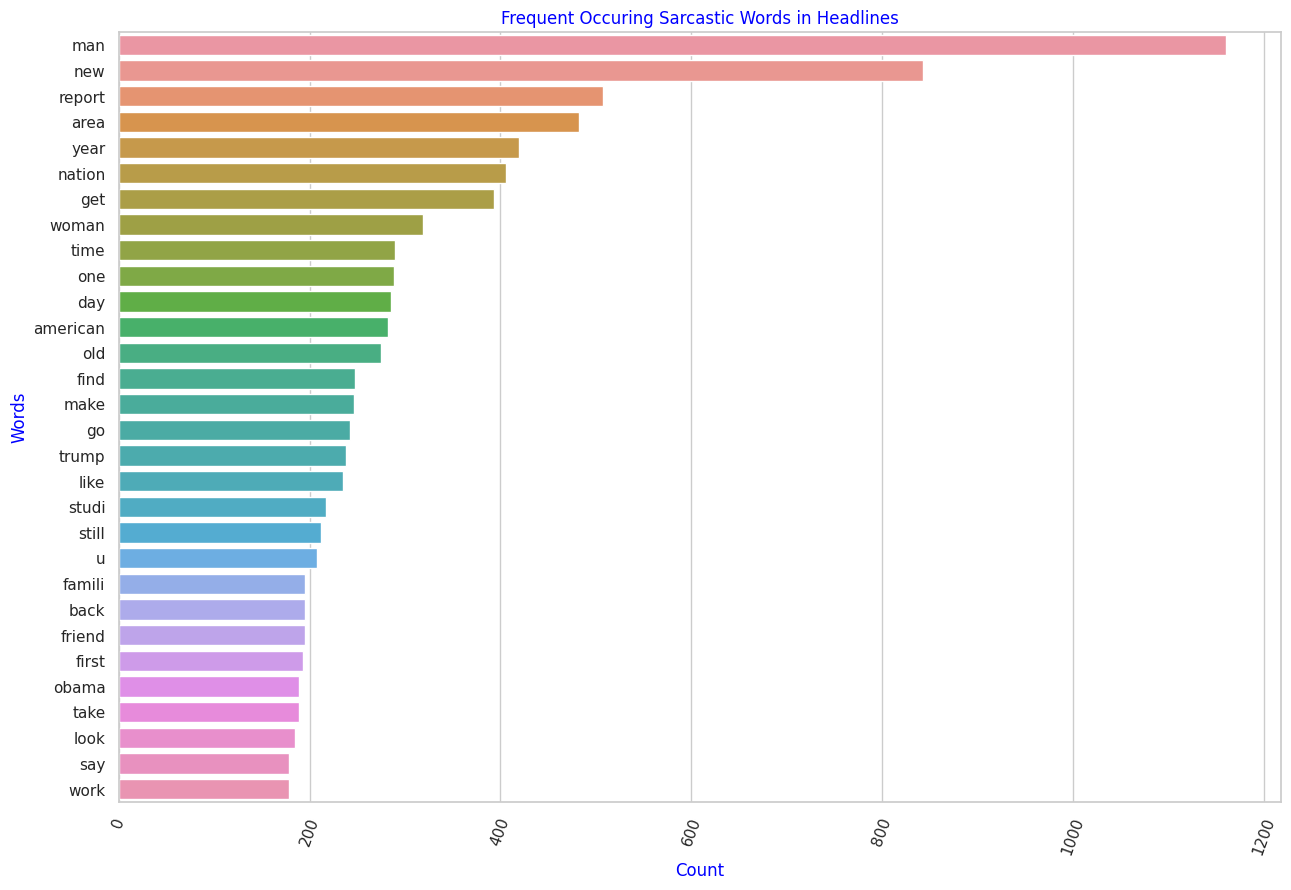

In [ ]:
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=sarcastic['index'][0:30], x=sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

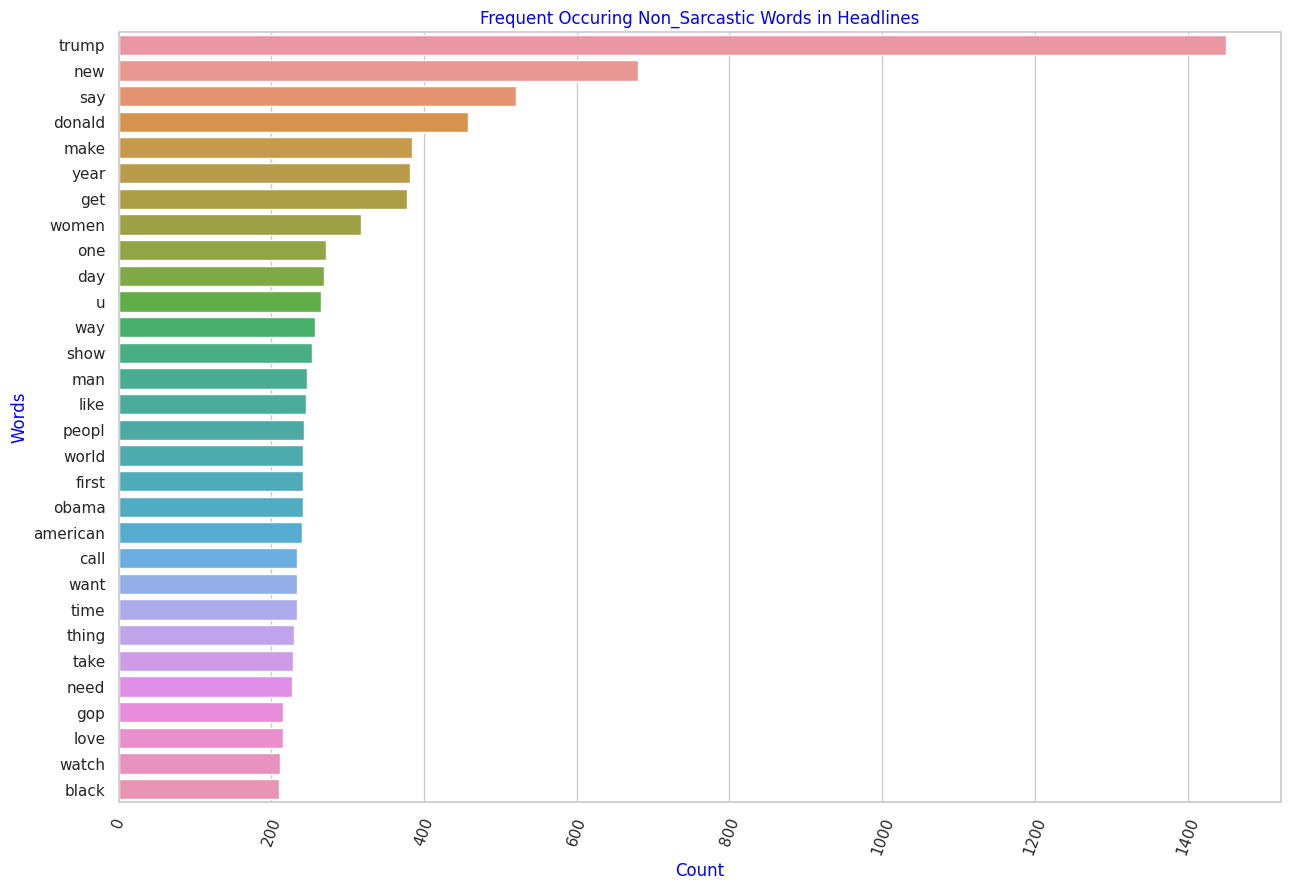

In [ ]:
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=non_sarcastic['index'][0:30], x=non_sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Non_Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]


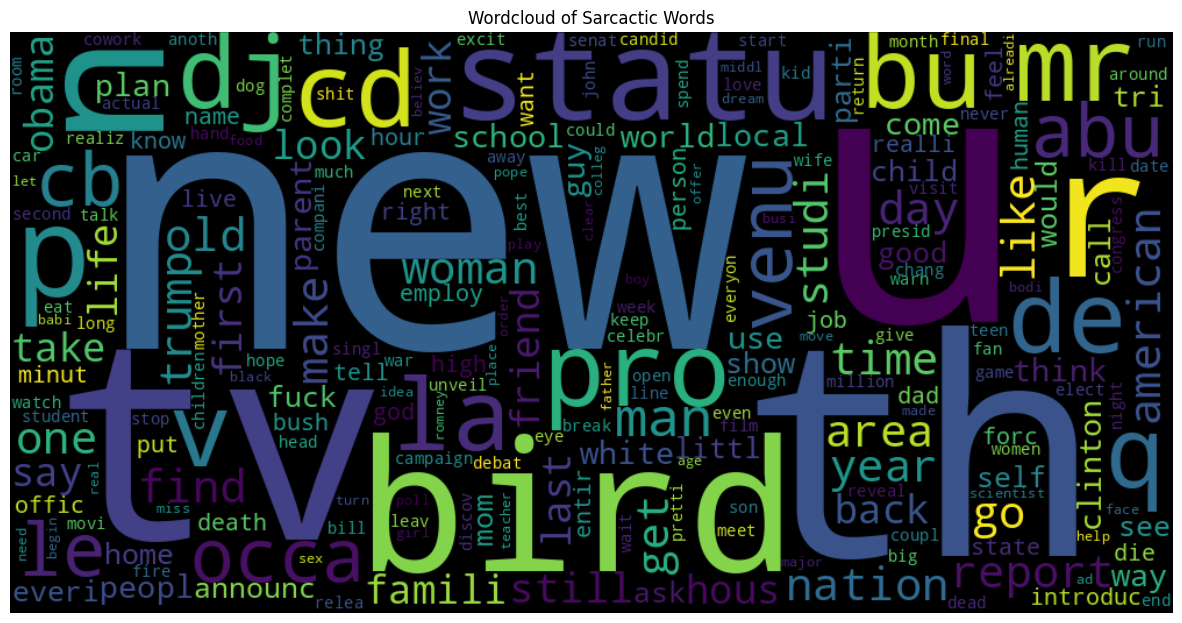

In [ ]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords, 
                      ).generate(' ' .join(word for word in sarc_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Sarcactic Words', color="black")
plt.axis("off")
plt.show()

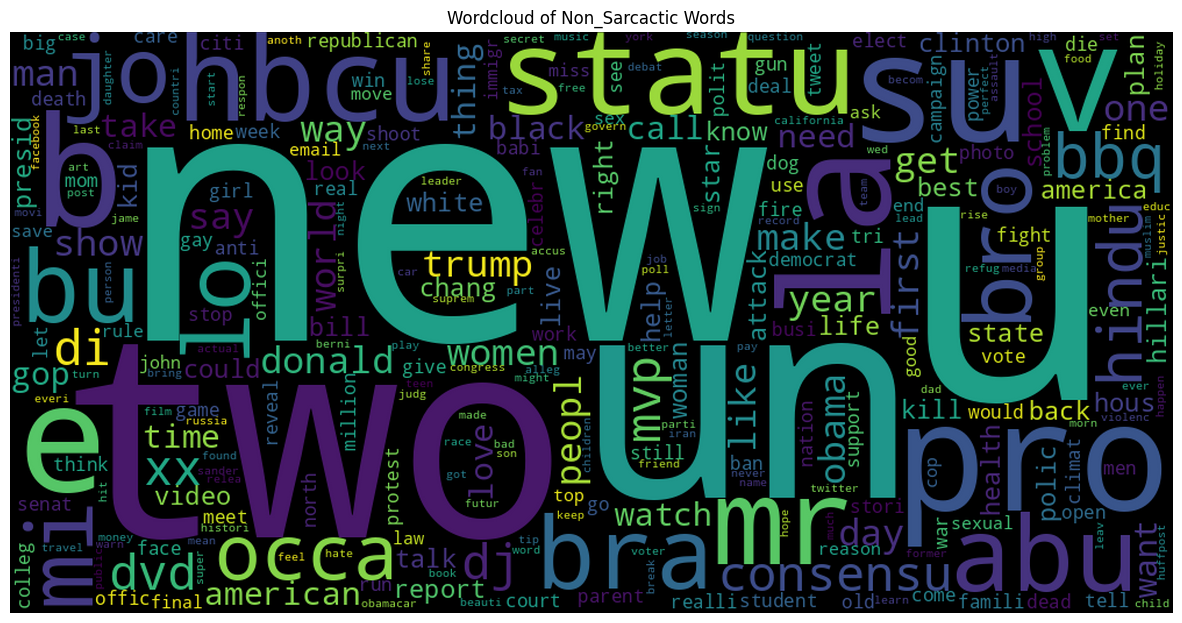

In [ ]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in non_sarc_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Non_Sarcactic Words', color="black")
plt.axis("off")
plt.show()

In [204]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2))
cv_data = cv.fit_transform(df['text'])

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tf_data = tfidf.fit_transform(df['text'])


In [198]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(n_features=2**10, norm=None, binary=False)
hash_data = hash_vectorizer.transform(df['text'])

In [207]:
from scipy.sparse import hstack
features = hstack([tf_data, cv_data, hash_data])

In [208]:
final_y = df['is_sarcastic']

In [209]:
from sklearn.model_selection import train_test_split
X_train  , X_test , y_train , y_test = train_test_split(features , final_y , test_size = 0.2 , stratify = final_y)

In [202]:
X_train.shape , X_test.shape

((21367, 164179), (5342, 164179))

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score
model = LogisticRegression()
model.fit(X_train , y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy', accuracy_score(y_test , pred))
print('Logistic regression F1-score', f1_score(y_test , pred))
print('Logistic regression precision:', precision_score(y_test, pred))
print('Logistic regression recall:',  recall_score(y_test, pred))

Logistic regression accuracy 0.8023212280044927
Logistic regression F1-score 0.7586837294332724
Logistic regression precision: 0.8173313638601674
Logistic regression recall: 0.7078891257995735


In [233]:
model.score(X_train, y_train)

0.9970983291992325

In [236]:
acc_logr = accuracy_score(y_test,pred)

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

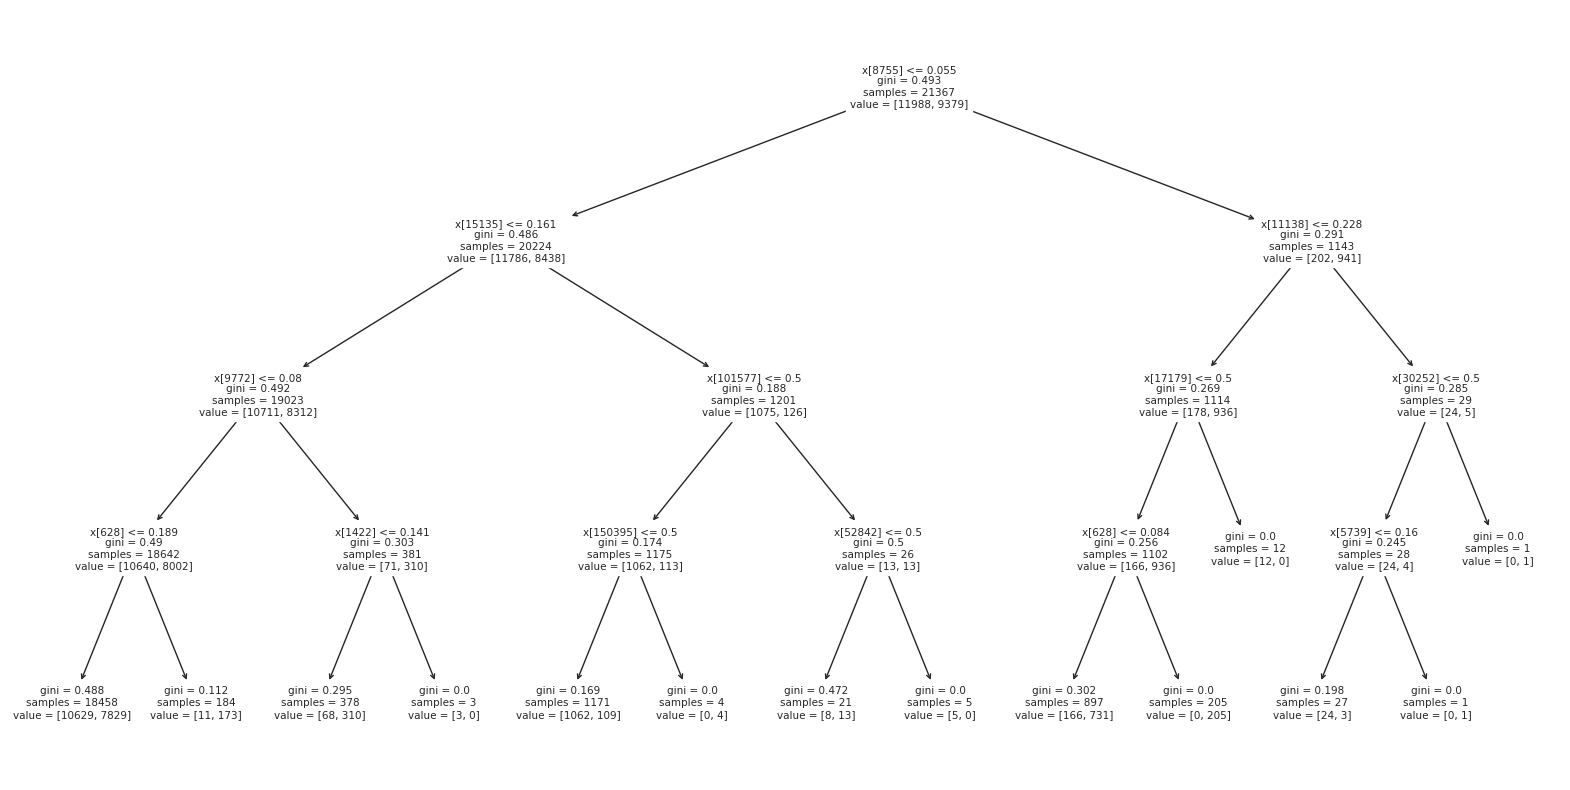

In [239]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(20, 10))

tree.plot_tree(tree_model, ax=ax)

plt.savefig('decision.pdf')
plt.show()


In [240]:
from sklearn.metrics import confusion_matrix, classification_report

In [241]:
y_pred = tree_model.predict(X_test)
test = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

array([[2933,   64],
       [2022,  323]])

In [242]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train , y_train)
pred = model.predict(X_test)
print('Decision tree accuracy:' ,accuracy_score(y_test , pred))
print('Decision tree F1 score:',  f1_score(y_test,pred))


Decision tree accuracy: 0.7188318981654811
Decision tree F1 score: 0.6681396376491382


In [243]:
print('Decision tree precision:', precision_score(y_test, pred))
print('Decision tree recall:',  recall_score(y_test, pred))

Decision tree precision: 0.6932599724896836
Decision tree recall: 0.6447761194029851


In [244]:
acc_tree = accuracy_score(y_test,pred)

In [245]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train , y_train)
pred = model.predict(X_test)
accuracy_score(y_test , pred)

0.7972669412205167

In [246]:
print('SVM accuracy:' ,accuracy_score(y_test , pred))
print('SVM F1 score:',  f1_score(y_test,pred))
print('SVM precision:', precision_score(y_test, pred))
print('SVM recall:',  recall_score(y_test, pred))

SVM accuracy: 0.7972669412205167
SVM F1 score: 0.7472578763127188
SVM precision: 0.8252577319587628
SVM recall: 0.68272921108742


In [247]:
acc_svm = accuracy_score(y_test,pred)

In [248]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train , y_train)
pred = model.predict(X_test)


In [249]:
print('RandomForest accuracy:' ,accuracy_score(y_test , pred))
print('RandomForest F1 score:',  f1_score(y_test,pred))
print('RandomForest precision:', precision_score(y_test, pred))
print('RandomForest recall:',  recall_score(y_test, pred))

RandomForest accuracy: 0.7607637588918008
RandomForest F1 score: 0.6814556331006979
RandomForest precision: 0.8200359928014397
RandomForest recall: 0.5829424307036247


In [250]:
acc_rf = accuracy_score(y_test,pred)

In [251]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train , y_train)
pred = model.predict(X_test)

In [252]:
print('knn accuracy:' ,accuracy_score(y_test , pred))
print('knn F1 score:',  f1_score(y_test,pred))
print('knn precision:', precision_score(y_test, pred))
print('knn recall:',  recall_score(y_test, pred))

knn accuracy: 0.5877948333957319
knn F1 score: 0.13917122752150118
knn precision: 0.8356807511737089
knn recall: 0.07590618336886994


In [254]:
acc_knn = accuracy_score(y_test,pred)

In [256]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train , y_train)
pred_nb = nb.predict(X_test)

In [257]:
print('Naive bayes accuracy:' ,accuracy_score(y_test , pred_nb))
print('Naive bayes F1 score:',  f1_score(y_test,pred_nb))
print('Naive bayes precision:', precision_score(y_test, pred))
print('Naive bayes recall:',  recall_score(y_test, pred))

Naive bayes accuracy: 0.8040059902658181
Naive bayes F1 score: 0.7721436343852013
Naive bayes precision: 0.8356807511737089
Naive bayes recall: 0.07590618336886994


In [258]:
acc_nb = accuracy_score(y_test,pred_nb)

In [259]:
models = ['DesicionTree','LogReg','SVM', 'RandomForest', 'NaiveBayes', 'kNN']
col = [acc_tree, acc_logr, acc_svm, acc_rf, acc_nb, acc_knn]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,Accuracy
0,DesicionTree,0.718832
1,LogReg,0.802321
2,SVM,0.797267
3,RandomForest,0.760764
4,NaiveBayes,0.804006
5,kNN,0.587795


In [260]:
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

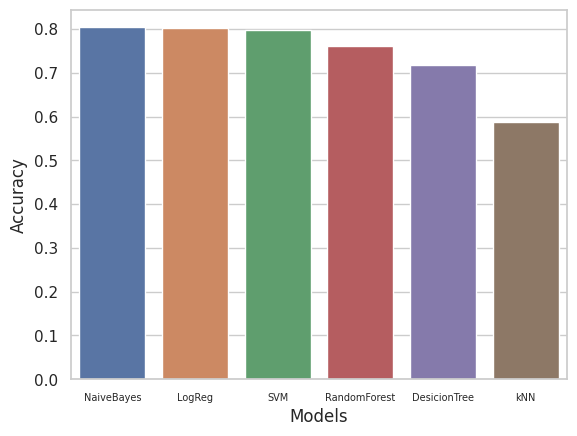

In [261]:
fig, ax = plt.subplots()

sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df)

ax.set_xticklabels(graph_df['Models'], fontsize=7)

plt.show()



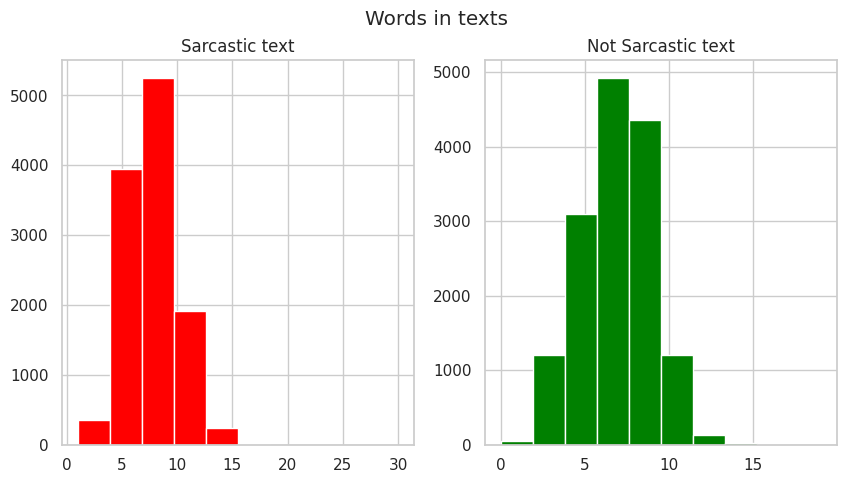

In [ ]:
fig ,(ax1 , ax2) = plt.subplots(1,2 , figsize = (10,5))
text_len = df[df['is_sarcastic'] == 1]['text'].str.split().map(lambda x : len(x))
ax1.hist(text_len , color ='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

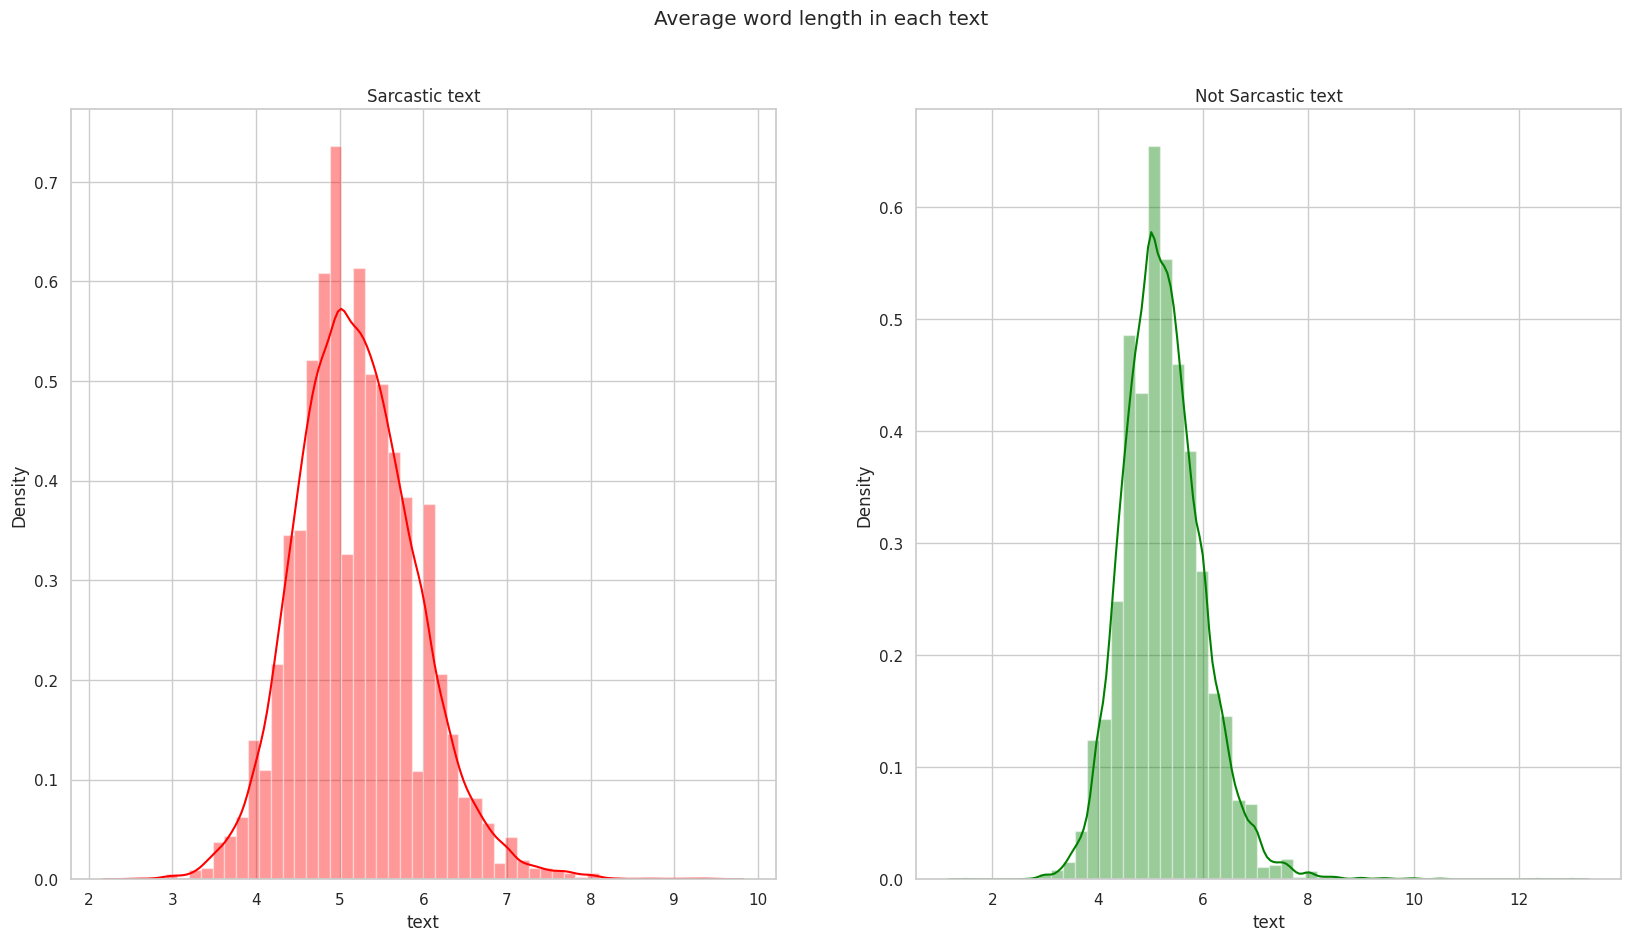

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['is_sarcastic']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

In [165]:
results = pd.DataFrame(data={'predicted': y_pred, 'actual': y_test})
predictions = results.join(df)

In [166]:
def is_correct(predicted, actual):
    if predicted == actual:
        return True
    else:
        return False

predictions['correct'] = predictions.apply(lambda x: is_correct(x.predicted, x.actual), axis=1)
predictions = predictions[['text','predicted','actual','correct']]

In [167]:
predictions[predictions['correct']==True].sample(100)

,text,predicted,actual,correct
25052,game chang play week nfl,0,0,True
2238,russia need turkey war isi,0,0,True
22516,bodi found may miss year old left outsid dad p...,0,0,True
22573,hong kong choo new beij back leader amid polit...,0,0,True
17052,night uninterrupt deep sleep realli throw man day,1,1,True
...,...,...,...,...
13553,digitalhealth learn fight hiv aid,0,0,True
26409,sheer beauti montana intrigu meet peopl living...,0,0,True
17740,report resign gop campaign alleg tri block dam...,0,0,True
18464,wednesday morn email conserv love propo gop ob...,0,0,True
